In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

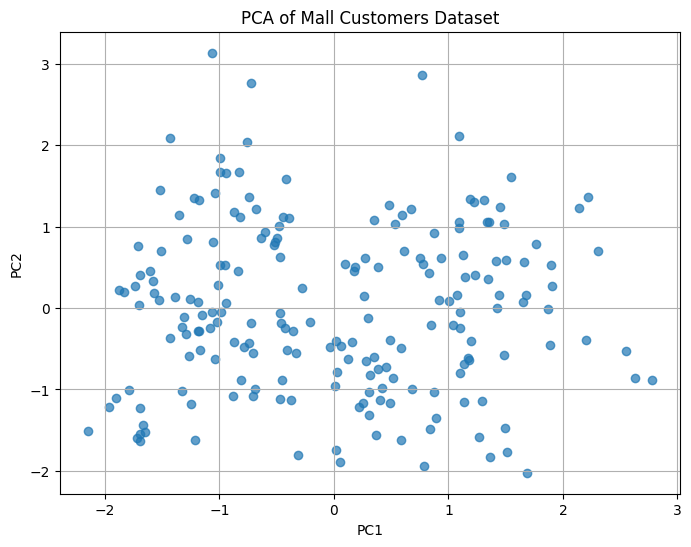

In [2]:
# 1.) Load and visualize dataset (optional PCA for 2D view).

df=pd.read_csv('/content/Mall_Customers.csv')

df_new=df.drop(['CustomerID'],axis=1)

le=LabelEncoder()
df_new['Gender']=le.fit_transform(df_new['Gender'])

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_new)

pca=PCA(n_components=2)
pca_data=pca.fit_transform(df_scaled)

pca_df=pd.DataFrame(data=pca_data,columns=['PC1','PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'],pca_df['PC2'],alpha=0.7)
plt.title('PCA of Mall Customers Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

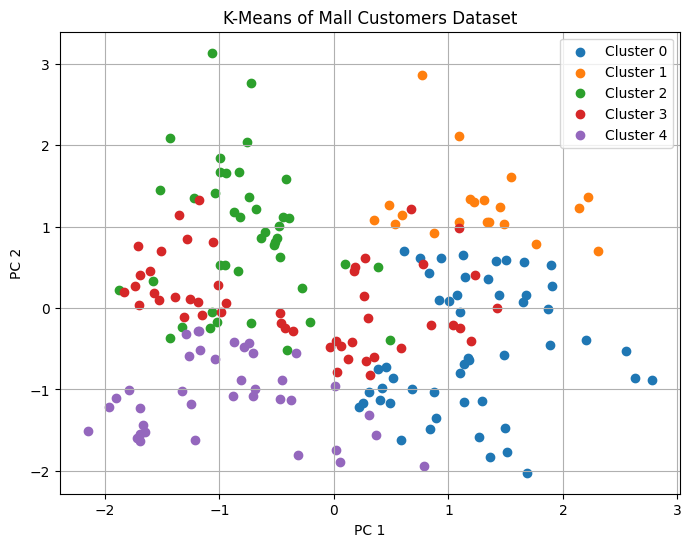

In [3]:
# 2.Fit K-Means and assign cluster labels.

k=5

kmeans=KMeans(n_clusters=k,random_state=42)
labels = kmeans.fit_predict(df_scaled)

pca_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means of Mall Customers Dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()

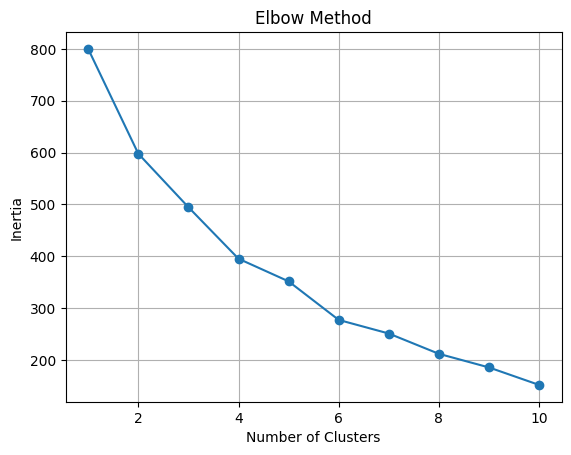

In [4]:
# 3.) Use the Elbow Method to find optimal K.

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

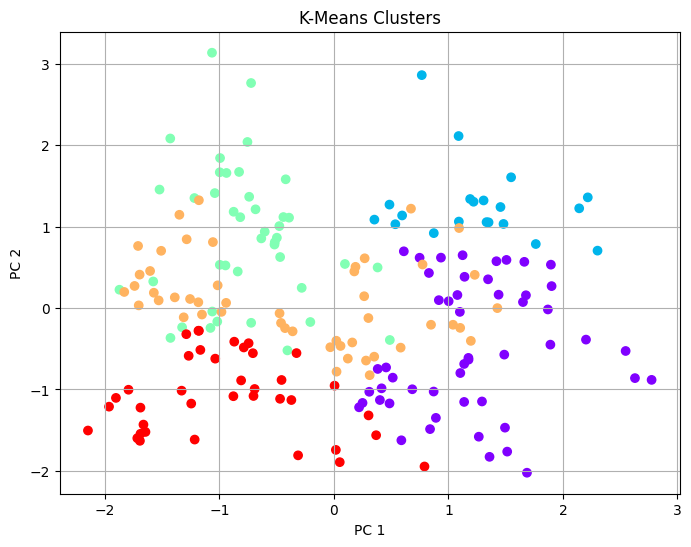

In [5]:
# 4.) Visualize clusters with color-coding.

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='rainbow')

plt.title('K-Means Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

In [6]:
# 5.) Evaluate clustering using Silhouette Score

score=silhouette_score(df_scaled, pca_df['Cluster'])

print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.272


**1. How does K-Means clustering work?**

Ans :

K-Means is an unsupervised learning algorithm that groups data points into K distinct clusters based on their similarity. It starts by randomly selecting K points as cluster centers (called centroids), then repeatedly:

    Assigns each data point to the nearest centroid

    Recomputes the centroids as the mean of all assigned points
This process continues until the clusters no longer change significantly.

**2. What is the Elbow Method?**

Ans :

The Elbow Method helps to determine the optimal number of clusters (K) in K-Means. It involves plotting the number of clusters against inertia (which measures how compact the clusters are). The "elbow point" in the graph — where inertia starts to decrease slowly — is usually the best choice for K.

**3. What are the limitations of K-Means?**

Ans :

It assumes spherical clusters of similar size, which might not fit real-world data.

Requires specifying K beforehand.

Sensitive to outliers and noise.

Results can vary depending on the initial placement of centroids.

**4. How does initialization affect results?**

Ans :

The initial positions of the centroids can lead to different final clusters, as K-Means may get stuck in a local minimum. Poor initialization can cause inaccurate clustering. To avoid this, modern implementations use smarter methods like k-means++, which chooses better starting points.

**5. What is inertia in K-Means?**

Ans :

Inertia is the sum of squared distances between each data point and its assigned cluster center. Lower inertia means tighter, more compact clusters. However, minimizing inertia alone doesn't always lead to meaningful clusters, which is why it's combined with methods like the Elbow Method.

**6. What is Silhouette Score?**

Ans :

The Silhouette Score measures how well each point fits within its cluster compared to other clusters. It ranges from -1 to 1:

    Close to 1 → point is well-matched to its cluster

    Around 0 → point is on the border between clusters

    Negative → point might be in the wrong cluster

**7. How do you choose the right number of clusters?**

Ans :

Common methods include:

    Elbow Method: Based on inertia

    Silhouette Score: Measures clustering quality

    Domain knowledge: Knowing how many groups make sense

**8. What’s the difference between clustering and classification?**

Ans :

Clustering is unsupervised: It finds patterns or groups in data without labels (e.g., customer segmentation).

Classification is supervised: It uses labeled data to train a model that can predict categories (e.g., spam vs. not spam).